In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Carregando o vocabulário

In [2]:
import json

with open('./data/vocab.json', 'r') as infile:
    vocab = json.load(infile)

vocabSize = len(vocab['idx'])

print('Vocabulary size:', vocabSize)

Vocabulary size: 15244


### Configurações e Hiperparâmetros

In [3]:
import torch
import torch.nn as nn
from data import get_loaders
from train import train, test, check_input
import models 
from matplotlib import pyplot as plt

In [4]:
classes = [
  'negative',
  'somewhat negative',
  'neutral',
  'somewhat positive',
  'positive'
]

In [5]:
def plot_instance(instance_id):
    text = train_loader.dataset.texts[instance_id]
    label = train_loader.dataset.labels[instance_id]
    label_str = classes[train_loader.dataset.labels[instance_id]]
    print('\nExample:')
    print(text)
    print('Label:', label, '-', label_str)

In [6]:
data_path = './data/'
device_name = 'cuda'
batch_size = 1024
nb_epochs = 10
log_interval = 5
lr = 1e-2
lr_step = 3
num_layers = 1
dropout = 0.2

In [7]:
device = torch.device(device_name)

train_loader, valid_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['train', 'valid'],
)

nb_words = len(train_loader.dataset.vocab)

print(
    'Train size: ', 
    len(train_loader.dataset.texts),
    len(train_loader.dataset.labels)
)
print(
    'Valid size : ', 
    len(valid_loader.dataset.texts),
    len(valid_loader.dataset.labels)
)

plot_instance(0)
plot_instance(1015)
plot_instance(5136)
plot_instance(8974)


Train size:  99878 99878
Valid size :  24970 24970

Example:
a zombie
Label: 2 - neutral

Example:
the assumption
Label: 2 - neutral

Example:
hilarious and
Label: 4 - positive

Example:
good cast
Label: 3 - somewhat positive


In [8]:
def average_pooling(instances, lens):
    return torch.stack([
        text[:l].mean(0) for text, l in zip(instances, lens)
    ])


class TextLSTM(nn.Module):
    def __init__(self, num_embeddings=vocabSize, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(
            num_embeddings=num_embeddings, 
            embedding_dim=embedding_dim,
        )
        self.rnn = nn.LSTM(
            input_size=100, hidden_size=32, 
            batch_first=True, bidirectional=True,
            num_layers=num_layers, dropout=dropout
        )
        self.fc = nn.Linear(32*2, len(classes))
        
    def forward(self, x, lengths):
        # Transforma índices das palavras em vetores 
        x = self.embedding(x)
        # Processa vetores das palavras com uma rede recorrente
        hidden, output = self.rnn(x)
        # Faz a média das ativações de todas as iterações recorrentes
        vector = average_pooling(hidden, lengths)
        # Camada linear para classificacao
        x = self.fc(vector)
        return x


In [9]:
model = TextLSTM()
model = model.to(device)

dummy_pred = check_input(model, device)

c:\users\luciano\appdata\local\programs\python\python37\lib\site-packages\torch\nn\modules\rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Passed


In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_step)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Treino e Validação


* * * Training * * *
Train Epoch:   1 [     0/ 99878 (0%)]	Loss: 1.569899
Train Epoch:   1 [  5120/ 99878 (5%)]	Loss: 1.248813
Train Epoch:   1 [ 10240/ 99878 (10%)]	Loss: 1.263977
Train Epoch:   1 [ 15360/ 99878 (15%)]	Loss: 1.220602
Train Epoch:   1 [ 20480/ 99878 (20%)]	Loss: 1.204640
Train Epoch:   1 [ 25600/ 99878 (26%)]	Loss: 1.205617
Train Epoch:   1 [ 30720/ 99878 (31%)]	Loss: 1.142408
Train Epoch:   1 [ 35840/ 99878 (36%)]	Loss: 1.178417
Train Epoch:   1 [ 40960/ 99878 (41%)]	Loss: 1.137475
Train Epoch:   1 [ 46080/ 99878 (46%)]	Loss: 1.094575
Train Epoch:   1 [ 51200/ 99878 (51%)]	Loss: 1.102818
Train Epoch:   1 [ 56320/ 99878 (56%)]	Loss: 0.995527
Train Epoch:   1 [ 61440/ 99878 (61%)]	Loss: 1.006625
Train Epoch:   1 [ 66560/ 99878 (66%)]	Loss: 1.039198
Train Epoch:   1 [ 71680/ 99878 (71%)]	Loss: 0.991863
Train Epoch:   1 [ 76800/ 99878 (77%)]	Loss: 0.961790
Train Epoch:   1 [ 81920/ 99878 (82%)]	Loss: 0.974815
Train Epoch:   1 [ 87040/ 99878 (87%)]	Loss: 0.930509
Train Ep

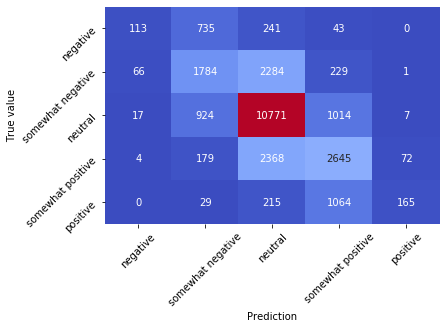


* * * Training * * *
Train Epoch:   2 [     0/ 99878 (0%)]	Loss: 0.851155
Train Epoch:   2 [  5120/ 99878 (5%)]	Loss: 0.816379
Train Epoch:   2 [ 10240/ 99878 (10%)]	Loss: 0.848994
Train Epoch:   2 [ 15360/ 99878 (15%)]	Loss: 0.837197
Train Epoch:   2 [ 20480/ 99878 (20%)]	Loss: 0.817295
Train Epoch:   2 [ 25600/ 99878 (26%)]	Loss: 0.846558
Train Epoch:   2 [ 30720/ 99878 (31%)]	Loss: 0.836961
Train Epoch:   2 [ 35840/ 99878 (36%)]	Loss: 0.775841
Train Epoch:   2 [ 40960/ 99878 (41%)]	Loss: 0.851103
Train Epoch:   2 [ 46080/ 99878 (46%)]	Loss: 0.835786
Train Epoch:   2 [ 51200/ 99878 (51%)]	Loss: 0.853858
Train Epoch:   2 [ 56320/ 99878 (56%)]	Loss: 0.833656
Train Epoch:   2 [ 61440/ 99878 (61%)]	Loss: 0.781516
Train Epoch:   2 [ 66560/ 99878 (66%)]	Loss: 0.805800
Train Epoch:   2 [ 71680/ 99878 (71%)]	Loss: 0.849778
Train Epoch:   2 [ 76800/ 99878 (77%)]	Loss: 0.856249
Train Epoch:   2 [ 81920/ 99878 (82%)]	Loss: 0.813556
Train Epoch:   2 [ 87040/ 99878 (87%)]	Loss: 0.775188
Train Ep

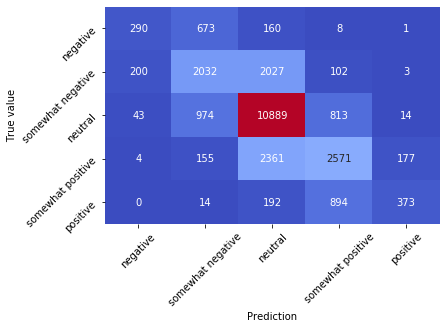


* * * Training * * *
Train Epoch:   3 [     0/ 99878 (0%)]	Loss: 0.717846
Train Epoch:   3 [  5120/ 99878 (5%)]	Loss: 0.682445
Train Epoch:   3 [ 10240/ 99878 (10%)]	Loss: 0.684409
Train Epoch:   3 [ 15360/ 99878 (15%)]	Loss: 0.705630
Train Epoch:   3 [ 20480/ 99878 (20%)]	Loss: 0.748294
Train Epoch:   3 [ 25600/ 99878 (26%)]	Loss: 0.739005
Train Epoch:   3 [ 30720/ 99878 (31%)]	Loss: 0.741526
Train Epoch:   3 [ 35840/ 99878 (36%)]	Loss: 0.740681
Train Epoch:   3 [ 40960/ 99878 (41%)]	Loss: 0.718954
Train Epoch:   3 [ 46080/ 99878 (46%)]	Loss: 0.705441
Train Epoch:   3 [ 51200/ 99878 (51%)]	Loss: 0.716322
Train Epoch:   3 [ 56320/ 99878 (56%)]	Loss: 0.740428
Train Epoch:   3 [ 61440/ 99878 (61%)]	Loss: 0.669458
Train Epoch:   3 [ 66560/ 99878 (66%)]	Loss: 0.715524
Train Epoch:   3 [ 71680/ 99878 (71%)]	Loss: 0.764747
Train Epoch:   3 [ 76800/ 99878 (77%)]	Loss: 0.719489
Train Epoch:   3 [ 81920/ 99878 (82%)]	Loss: 0.740194
Train Epoch:   3 [ 87040/ 99878 (87%)]	Loss: 0.737996
Train Ep

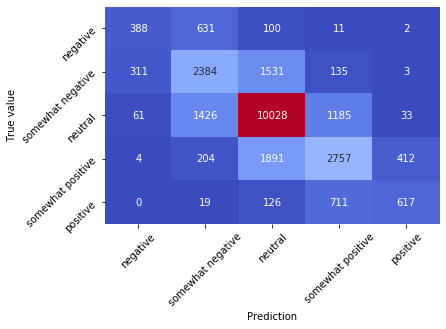


* * * Training * * *
Train Epoch:   4 [     0/ 99878 (0%)]	Loss: 0.657688
Train Epoch:   4 [  5120/ 99878 (5%)]	Loss: 0.625413
Train Epoch:   4 [ 10240/ 99878 (10%)]	Loss: 0.658114
Train Epoch:   4 [ 15360/ 99878 (15%)]	Loss: 0.611536
Train Epoch:   4 [ 20480/ 99878 (20%)]	Loss: 0.664984
Train Epoch:   4 [ 25600/ 99878 (26%)]	Loss: 0.612963
Train Epoch:   4 [ 30720/ 99878 (31%)]	Loss: 0.638055
Train Epoch:   4 [ 35840/ 99878 (36%)]	Loss: 0.610350
Train Epoch:   4 [ 40960/ 99878 (41%)]	Loss: 0.590319
Train Epoch:   4 [ 46080/ 99878 (46%)]	Loss: 0.630369
Train Epoch:   4 [ 51200/ 99878 (51%)]	Loss: 0.621449
Train Epoch:   4 [ 56320/ 99878 (56%)]	Loss: 0.631625
Train Epoch:   4 [ 61440/ 99878 (61%)]	Loss: 0.573632
Train Epoch:   4 [ 66560/ 99878 (66%)]	Loss: 0.635604
Train Epoch:   4 [ 71680/ 99878 (71%)]	Loss: 0.652466
Train Epoch:   4 [ 76800/ 99878 (77%)]	Loss: 0.625335
Train Epoch:   4 [ 81920/ 99878 (82%)]	Loss: 0.601331
Train Epoch:   4 [ 87040/ 99878 (87%)]	Loss: 0.646687
Train Ep

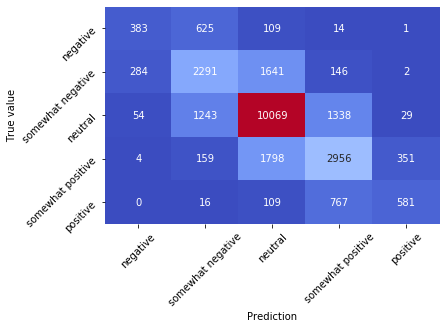


* * * Training * * *
Train Epoch:   5 [     0/ 99878 (0%)]	Loss: 0.609494
Train Epoch:   5 [  5120/ 99878 (5%)]	Loss: 0.601404
Train Epoch:   5 [ 10240/ 99878 (10%)]	Loss: 0.617270
Train Epoch:   5 [ 15360/ 99878 (15%)]	Loss: 0.623584
Train Epoch:   5 [ 20480/ 99878 (20%)]	Loss: 0.569506
Train Epoch:   5 [ 25600/ 99878 (26%)]	Loss: 0.609540
Train Epoch:   5 [ 30720/ 99878 (31%)]	Loss: 0.613482
Train Epoch:   5 [ 35840/ 99878 (36%)]	Loss: 0.616847
Train Epoch:   5 [ 40960/ 99878 (41%)]	Loss: 0.628223
Train Epoch:   5 [ 46080/ 99878 (46%)]	Loss: 0.568768
Train Epoch:   5 [ 51200/ 99878 (51%)]	Loss: 0.563079
Train Epoch:   5 [ 56320/ 99878 (56%)]	Loss: 0.625175
Train Epoch:   5 [ 61440/ 99878 (61%)]	Loss: 0.575899
Train Epoch:   5 [ 66560/ 99878 (66%)]	Loss: 0.603871
Train Epoch:   5 [ 71680/ 99878 (71%)]	Loss: 0.565031
Train Epoch:   5 [ 76800/ 99878 (77%)]	Loss: 0.591392
Train Epoch:   5 [ 81920/ 99878 (82%)]	Loss: 0.579192
Train Epoch:   5 [ 87040/ 99878 (87%)]	Loss: 0.578936
Train Ep

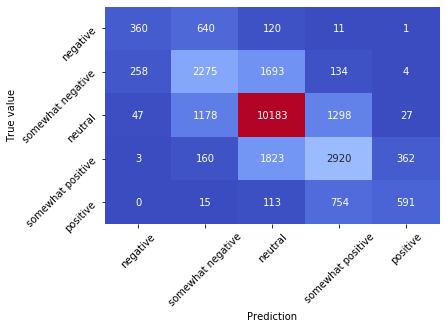


* * * Training * * *
Train Epoch:   6 [     0/ 99878 (0%)]	Loss: 0.566763
Train Epoch:   6 [  5120/ 99878 (5%)]	Loss: 0.555579
Train Epoch:   6 [ 10240/ 99878 (10%)]	Loss: 0.531665
Train Epoch:   6 [ 15360/ 99878 (15%)]	Loss: 0.563144
Train Epoch:   6 [ 20480/ 99878 (20%)]	Loss: 0.529451
Train Epoch:   6 [ 25600/ 99878 (26%)]	Loss: 0.634550
Train Epoch:   6 [ 30720/ 99878 (31%)]	Loss: 0.589533
Train Epoch:   6 [ 35840/ 99878 (36%)]	Loss: 0.621181
Train Epoch:   6 [ 40960/ 99878 (41%)]	Loss: 0.559971
Train Epoch:   6 [ 46080/ 99878 (46%)]	Loss: 0.587272
Train Epoch:   6 [ 51200/ 99878 (51%)]	Loss: 0.583418
Train Epoch:   6 [ 56320/ 99878 (56%)]	Loss: 0.564889
Train Epoch:   6 [ 61440/ 99878 (61%)]	Loss: 0.584723
Train Epoch:   6 [ 66560/ 99878 (66%)]	Loss: 0.605179
Train Epoch:   6 [ 71680/ 99878 (71%)]	Loss: 0.570602
Train Epoch:   6 [ 76800/ 99878 (77%)]	Loss: 0.527033
Train Epoch:   6 [ 81920/ 99878 (82%)]	Loss: 0.614923
Train Epoch:   6 [ 87040/ 99878 (87%)]	Loss: 0.574186
Train Ep

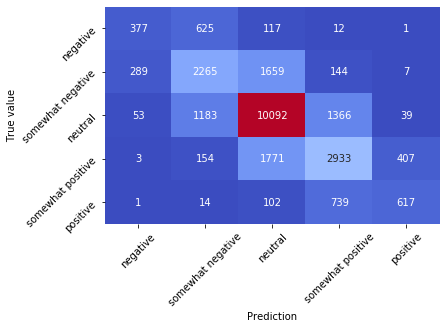


* * * Training * * *
Train Epoch:   7 [     0/ 99878 (0%)]	Loss: 0.544311
Train Epoch:   7 [  5120/ 99878 (5%)]	Loss: 0.576534
Train Epoch:   7 [ 10240/ 99878 (10%)]	Loss: 0.567006
Train Epoch:   7 [ 15360/ 99878 (15%)]	Loss: 0.563755
Train Epoch:   7 [ 20480/ 99878 (20%)]	Loss: 0.537717
Train Epoch:   7 [ 25600/ 99878 (26%)]	Loss: 0.539452
Train Epoch:   7 [ 30720/ 99878 (31%)]	Loss: 0.533175
Train Epoch:   7 [ 35840/ 99878 (36%)]	Loss: 0.570156
Train Epoch:   7 [ 40960/ 99878 (41%)]	Loss: 0.559106
Train Epoch:   7 [ 46080/ 99878 (46%)]	Loss: 0.575575
Train Epoch:   7 [ 51200/ 99878 (51%)]	Loss: 0.557069
Train Epoch:   7 [ 56320/ 99878 (56%)]	Loss: 0.576116
Train Epoch:   7 [ 61440/ 99878 (61%)]	Loss: 0.598974
Train Epoch:   7 [ 66560/ 99878 (66%)]	Loss: 0.576718
Train Epoch:   7 [ 71680/ 99878 (71%)]	Loss: 0.572077
Train Epoch:   7 [ 76800/ 99878 (77%)]	Loss: 0.597594
Train Epoch:   7 [ 81920/ 99878 (82%)]	Loss: 0.540524
Train Epoch:   7 [ 87040/ 99878 (87%)]	Loss: 0.576768
Train Ep

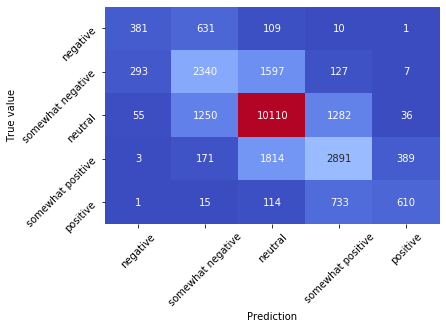


* * * Training * * *
Train Epoch:   8 [     0/ 99878 (0%)]	Loss: 0.537893
Train Epoch:   8 [  5120/ 99878 (5%)]	Loss: 0.547024
Train Epoch:   8 [ 10240/ 99878 (10%)]	Loss: 0.559678
Train Epoch:   8 [ 15360/ 99878 (15%)]	Loss: 0.536909
Train Epoch:   8 [ 20480/ 99878 (20%)]	Loss: 0.556990
Train Epoch:   8 [ 25600/ 99878 (26%)]	Loss: 0.596685
Train Epoch:   8 [ 30720/ 99878 (31%)]	Loss: 0.542314
Train Epoch:   8 [ 35840/ 99878 (36%)]	Loss: 0.543125
Train Epoch:   8 [ 40960/ 99878 (41%)]	Loss: 0.614301
Train Epoch:   8 [ 46080/ 99878 (46%)]	Loss: 0.575836
Train Epoch:   8 [ 51200/ 99878 (51%)]	Loss: 0.575924
Train Epoch:   8 [ 56320/ 99878 (56%)]	Loss: 0.596739
Train Epoch:   8 [ 61440/ 99878 (61%)]	Loss: 0.557531
Train Epoch:   8 [ 66560/ 99878 (66%)]	Loss: 0.549758
Train Epoch:   8 [ 71680/ 99878 (71%)]	Loss: 0.578214
Train Epoch:   8 [ 76800/ 99878 (77%)]	Loss: 0.562674
Train Epoch:   8 [ 81920/ 99878 (82%)]	Loss: 0.613532
Train Epoch:   8 [ 87040/ 99878 (87%)]	Loss: 0.571886
Train Ep

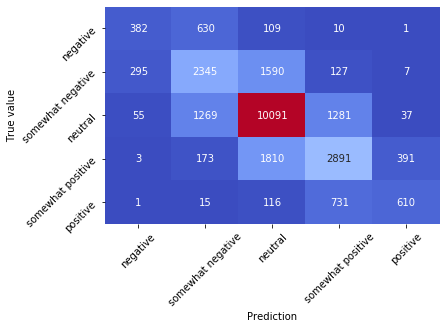


* * * Training * * *
Train Epoch:   9 [     0/ 99878 (0%)]	Loss: 0.512971
Train Epoch:   9 [  5120/ 99878 (5%)]	Loss: 0.543120
Train Epoch:   9 [ 10240/ 99878 (10%)]	Loss: 0.543743
Train Epoch:   9 [ 15360/ 99878 (15%)]	Loss: 0.565729
Train Epoch:   9 [ 20480/ 99878 (20%)]	Loss: 0.538448
Train Epoch:   9 [ 25600/ 99878 (26%)]	Loss: 0.564005
Train Epoch:   9 [ 30720/ 99878 (31%)]	Loss: 0.567678
Train Epoch:   9 [ 35840/ 99878 (36%)]	Loss: 0.562565
Train Epoch:   9 [ 40960/ 99878 (41%)]	Loss: 0.548445
Train Epoch:   9 [ 46080/ 99878 (46%)]	Loss: 0.567829
Train Epoch:   9 [ 51200/ 99878 (51%)]	Loss: 0.576630
Train Epoch:   9 [ 56320/ 99878 (56%)]	Loss: 0.567965
Train Epoch:   9 [ 61440/ 99878 (61%)]	Loss: 0.537224
Train Epoch:   9 [ 66560/ 99878 (66%)]	Loss: 0.544669
Train Epoch:   9 [ 71680/ 99878 (71%)]	Loss: 0.587324
Train Epoch:   9 [ 76800/ 99878 (77%)]	Loss: 0.617505
Train Epoch:   9 [ 81920/ 99878 (82%)]	Loss: 0.573227
Train Epoch:   9 [ 87040/ 99878 (87%)]	Loss: 0.574649
Train Ep

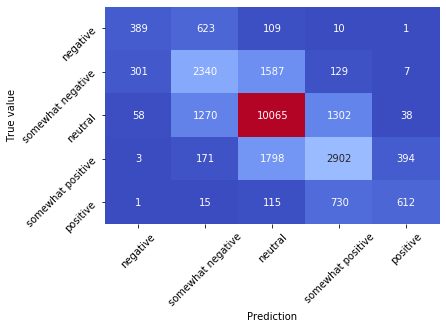


* * * Training * * *
Train Epoch:  10 [     0/ 99878 (0%)]	Loss: 0.571081
Train Epoch:  10 [  5120/ 99878 (5%)]	Loss: 0.551517
Train Epoch:  10 [ 10240/ 99878 (10%)]	Loss: 0.591602
Train Epoch:  10 [ 15360/ 99878 (15%)]	Loss: 0.576440
Train Epoch:  10 [ 20480/ 99878 (20%)]	Loss: 0.574245
Train Epoch:  10 [ 25600/ 99878 (26%)]	Loss: 0.569311
Train Epoch:  10 [ 30720/ 99878 (31%)]	Loss: 0.546925
Train Epoch:  10 [ 35840/ 99878 (36%)]	Loss: 0.515266
Train Epoch:  10 [ 40960/ 99878 (41%)]	Loss: 0.558553
Train Epoch:  10 [ 46080/ 99878 (46%)]	Loss: 0.556956
Train Epoch:  10 [ 51200/ 99878 (51%)]	Loss: 0.552136
Train Epoch:  10 [ 56320/ 99878 (56%)]	Loss: 0.571592
Train Epoch:  10 [ 61440/ 99878 (61%)]	Loss: 0.581677
Train Epoch:  10 [ 66560/ 99878 (66%)]	Loss: 0.595070
Train Epoch:  10 [ 71680/ 99878 (71%)]	Loss: 0.574202
Train Epoch:  10 [ 76800/ 99878 (77%)]	Loss: 0.567225
Train Epoch:  10 [ 81920/ 99878 (82%)]	Loss: 0.584971
Train Epoch:  10 [ 87040/ 99878 (87%)]	Loss: 0.590667
Train Ep

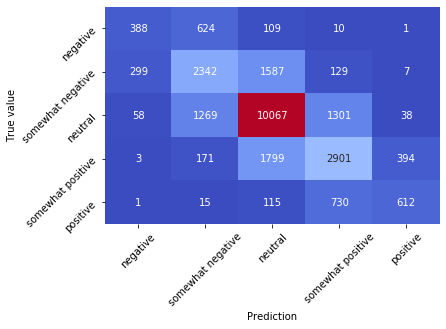

In [12]:
history = train(
    model=model, train_loader=train_loader, test_loader=valid_loader, classes=classes,
    device=device, optimizer=optimizer, lr_scheduler=lr_scheduler,
    nb_epochs=nb_epochs, log_interval=log_interval
)

### Resultados do treino

In [13]:
print('Max val acc: {:.2f}%'.format(max(history['val_acc'])))

Max val acc: 65.41%


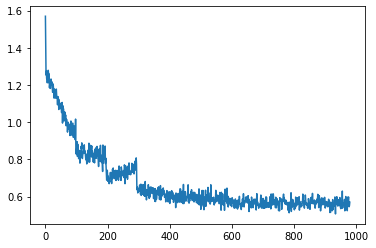

In [14]:
plt.plot(history['train_loss'])
plt.show()

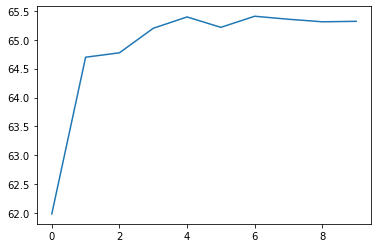

In [15]:
plt.plot(history['val_acc'])
plt.show()